In [1]:
# Add MatPlotLib Inline Magic Command.

%matplotlib inline


# Import Dependencies.

import matplotlib.pyplot as plt

import pandas as pd



# Files To Load.

city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"


# Read The City Data File And The Ride Data File.

city_data_df = pd.read_csv(city_data_to_load)

ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
# Combine The Data Into A Single Dataset.

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])



# Display The Data Table For Preview.

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [3]:
Deliverable 1:

# 1. Get The Total Number Of Rides For Each City Type.

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2.  Get The Total Number Of Drivers For Each City Type.

total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
# 3. Get The Total Number Of Fares For Each City Type.

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
# 4. Get The Average Fare Per Ride For Each City Type. 

avg_ridefare =  total_fares / total_rides

avg_ridefare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get The Average Fare Per Driver For Each City Type.

avg_driverfare =  total_fares / total_drivers

avg_driverfare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
# 6. Create A PyBer Summary DataFrame. 


# Assemble Into DataFrame.

type_summary_df = pd.DataFrame({
    
          "Total Rides" : total_rides,
    
          "Total Drivers": total_drivers,
    
          "Total Fares": total_fares,
    
          "Average Fare per Ride": avg_ridefare,
    
          "Average Fare per Driver": avg_driverfare})

type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
# 7. Clean Up The DataFrame.

type_summary_df.index.name = None

In [10]:
# 8. Format The Columns.

type_summary_df["Total Rides"] = type_summary_df["Total Rides"].map("{:.0f}".format)

type_summary_df["Total Drivers"] = type_summary_df["Total Drivers"].map("{:.0f}".format)

type_summary_df["Total Fares"] = type_summary_df["Total Fares"].map('${:,.2f}'.format)

type_summary_df["Average Fare per Ride"] = type_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)

type_summary_df["Average Fare per Driver"] = type_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

type_summary_df 

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [11]:
Deliverable 2:

# 1. Create A New DataFrame Displaying The Sum Of Fares.

import matplotlib.pyplot as plt

import pandas as pd


city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"


city_data_df = pd.read_csv(city_data_to_load)

ride_data_df = pd.read_csv(ride_data_to_load)


pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

df = pyber_data_df.groupby(["type","date"]).sum()["fare"]

df

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [12]:
# 2. Reset The DataFrame Index.

df = df.reset_index()

In [13]:
# 3. Create A Pivot Table To Obtain The Total Fares For Each Type Of City By Date. 

df = pyber_data_df.pivot_table(index ='date',columns = 'type', values = 'fare')

df

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [14]:
# 4. Set The "Date" Index To The Datetime Datatype. 

df.index = pd.to_datetime(df.index)

df.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               '2019-01-01 17:22:00', '2019-01-01 21:04:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               ...
               '2019-05-07 05:55:00', '2019-05-07 07:08:00',
               '2019-05-07 08:47:00', '2019-05-08 11:38:00',
               '2019-05-08 13:10:00', '2019-05-08 01:54:00',
               '2019-05-08 02:31:00', '2019-05-08 04:20:00',
               '2019-05-08 04:39:00', '2019-05-08 07:29:00'],
              dtype='datetime64[ns]', name='date', length=2361, freq=None)

In [15]:
# 5. Check The Datatype Of The Index.

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [16]:
# 6. Create A New DataFrame By Week And Obtain The Sum Of Fares For Each Week.

df = df.resample('W').sum()

df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.600,1661.68
2019-01-13,67.65,1070.825,2050.43
2019-01-20,306.00,1218.200,1939.02
2019-01-27,179.69,1203.280,2098.47
2019-02-03,333.08,1042.790,2070.49
2019-02-10,115.80,974.340,2162.64
2019-02-17,95.82,1045.500,2235.07
2019-02-24,419.06,1412.740,2466.29
2019-03-03,175.14,858.460,2218.20


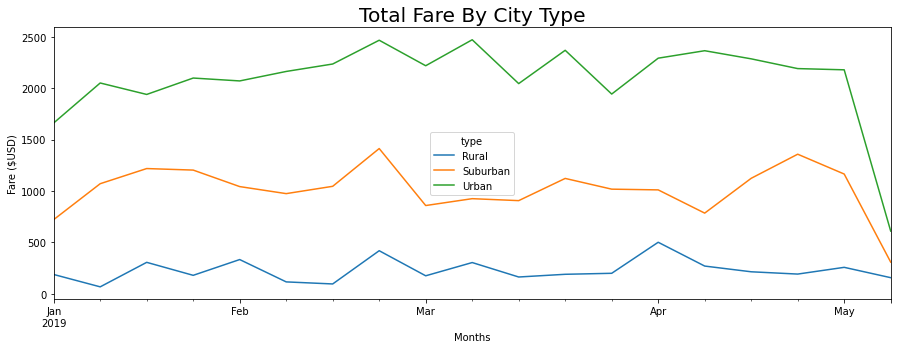

In [17]:
# 7. Plot The Resample DataFrame By Using The Object-Oriented Interface Method. 

df.plot(figsize = (15,5))


# Import The Style From Matplotlib.

from matplotlib import style


# Use The Five Thirty Eight Graph Style.

style.use('fivethirtyeight')

plt.title("Total Fare By City Type")

plt.ylabel("Fare ($USD)")

plt.xlabel("Months")

plt.savefig("Analysis/PyBer-Fare-Summary.png",dpi= 300, bbox_inches='tight')